#Rapport d'Analyse des Données de Valeurs Foncières

##I. Introduction
Ce rapport présente une analyse détaillée des données de valeurs foncières. L'objectif de cette analyse est de comprendre les caractéristiques des transactions immobilières, d'identifier les tendances et de préparer les données pour une utilisation ultérieure dans des modèles d'apprentissage automatique.

##II. Présentation des données
Les données utilisées dans cette analyse proviennent de plusieurs fichiers et comprennent des informations sur les transactions immobilières. Voici une présentation des données :

- *Source des données* : Fichiers "valeursfoncieres-2018.txt", "valeursfoncieres-2019.txt", "valeursfoncieres-2020.txt" et "valeursfoncieres-2021.txt". Ils ont, par la suite, été concaténés en un fichier "concat.csv".

- *Source des données externes*: Fichier "departements-version-simplifiee.geojson". Ce fichier nous a dans un premier temps été utile pour faire la carte de notre application, mais aussi pour faire nos prédictions.

- *Types de données* : Pour ce projet les données que nous avons retrouvées dans nos différents fichiers sont des données de type:
  - Objet/Texte: les colonnes avec ce type de donnée donnent une descritpion détaillée du bien immobilier, comme par exemple le type de local à vendre (maison/appartement/dépendance/local industriel, commercial ou assimilé);
  - Float: pour les données numériques décimales telles que la surface réelle du bâtiment;
  - Int : pour les données numériques entières comme le code des communes.

## III. Prétraitement des données
Le pré-traitement des données est essentiel pour le processus d'analyse de donnnées. Il permet de préparer les données brutes pour qu'elles soient adaptées à l'analyse, en garantissant leur qualité. Voici les différentes étapes de notre pré-traitement des données :


### **A. Chargement et Assemblage des Données**
Nous avons utilisé les 4 jeux de données, que nous avons assemblé dans un fichier unique, et c'est sur ce fichier que nous avons fait notre nettoyage et notre feature engineering.


### **B. Nettoyage des Données**
Dans un premier temps, nous avons nettoyé les données en supprimant les colonnes et les lignes qui ne nous semblaient pas utiles pour notre analyse. Les actions clés réalisées sur les colonnes, les lignes et les variables sont les suivantes :
- Suppression des colonnes ayant plus de 70% de valeurs manquantes, telque les colonnes "No disposition", "Identifiant local" ou "Nature culture spéciale";
- Suppression des lignes avec des valeurs manquantes dans les colonnes "Valeur foncière," "Type local," et "Code postal";
- Suppresion des lignes qui ne sont pas des ventes dans la colonne "Nature mutation";
- Suppression des doublons pour éliminer les dépendances entre les lignes;
- Suppression de colonnes supplémentaires spécifiées dans la liste `var_drop`;
- Les variables de la colonne "Nature culture" ont été binarisées (1 pour "S," 0 pour les autres valeurs);

Nous nous sommes ensuite intéressé plus spécifiquement au type des variables. Certains types de variables ont été modifiés pour faciliter nos calculs.

Par exemple, nous avons remarqué que dans la colonne "Code postal" certaines valeurs étaient en string et d'autre en integer.
Nous les avons donc toutes changer en string, pour ensuite formater les codes postaux inférieur à 10 pour qu'ils aient une longueur totale de deux caractères. Par exemple, le département 7 a été remplacé 07.





### **C. Traitement des Valeurs Manquantes**
Nous avons géré les valeurs manquantes dans certaines colonnes de manière appropriée afin de ne pas avoir de données manquante. En effet, voici comment nous les avons traités en fonction des colonnes:
- "Type de voie" elles ont été remplacées avec le mode de la colonne;
- "Surface réelle bâtie" remplacées cette fois-ci avec la médiane de la colonne;
- "Nombre pièces principales", nous les avons également remplacées par le mode;
- Dans la colonne "Surface terrain" elles ont été remplacées par des 0 pour les types locaux "Appartements". Les lignes sans valeurs restantes ont été supprimées;
- "latitude" et "longitude" les lignes ayant des valeurs manquantes ont été remplies par des 0 pour qu'elles soient quand même prises en compte dans notre modèle.

### **D. Suppression des Valeurs Aberrantes**
Nous avons utilisé la méthode de l'écart inter-quartile (IQR = Q3 - Q1) pour supprimer les valeurs aberrantes dans les colonnes "Valeur foncière", "Surface réelle bâtie", "Nombre pièces principales" et "Surface terrain". En effet, il était nécessaire de le faire puisque certaines lignes annonçaient plus de 20 pièces principales.

### **E. Ajout de colonnes**
Afin de préciser nos prédictions nous avons choisi d'ajouter les colonnes "Mois" et "Année" à notre base. Pour cela nous avons converti la colonne "Date mutation" au format date. Nous avons donc ensuite, facilement pu extraire le mois de chaque date que nous avons mis dans la colonne "Mois", la procédure a été la même pour la colonne "Année".

Nous avons ajouté les colonnes "Latitude" et "Longitude" de la base "lat_fu" dans notre dataframe. Ces données ont été récupérées sur des données en Open data, nous les avons fait correspondre avec nos données de base grace au code département et code commune.



## IV. Les différentes analyses

### **A. Le prix au mètre carré**
L'analyse des prix au mètre carré est essentielle pour comprendre les tendances immobilières.

Nous avons fait le choix de le calculer avec les données que nous avions dans notre base. En amont, nous avons malgré tout chercher des données en Open data mais, celles que nous avions trouvées étaient basées sur les données que nous avions déjà. Il ne nous a pas semblé utile de les récupérer étant donné que nous pouvions faire le calcul nous-mêmes.

Avant de procéder au calcul, nous avons créé un nouveau dataframe dans lequel nous avons exclus les types locaux qui étaient des dépendances ainsi que toutes les lignes du dataframe initial qui avaient une surface réelle de bâtiment nulle.
Suite à cela nous avons procédé au calcul, pour cela nous avons divisé les valeurs foncières par les surfaces réelles des bâtiments.

Nous avons ensuite calculé le prix au mètre carré par régions et par département en fonction des quatre années de notre base. Ces données sont essentielles pour comprendre les variations des prix au mètre carré dans l'ensemble de la France entre 2018 et 2022.

Le prix au mètre carré est un bon indicateur, mais est malheureusement trop dépendant des données de la base, qui ont pour certaines été modifié lors du nettoyage des données. C'est pourquoi nous nous sommes basé sur le prix au mètre carré par département pour nos modèles.

### **B. Corrélation des variables**

L'étape suivante a été d'analyser les corrélations entre la variable "Valeur foncière" et nos autres variables. Cette étape nous a permis de visualiser les variables pertinentes pour nos modèles de prédiction.  

Pour cela, nous avons fait une matrice de corrélation qui nous a permis de déterminer que les variables qui ont une relation forte avec "Valeur foncière" sont: "Prix au m² moyen commune", "Prix au m² moyen région", "Surface reelle bati" et "Nombre de pièces principales".

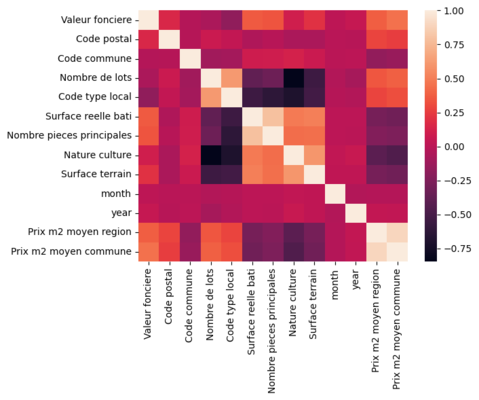

## V.Modèle de prédiction
Dans cette partie, nous allons expliquer le cheminement utilisé pour développer le modèle de prédiction du prix de vente.  
Le fichier de prévisions possédant des valeurs manquantes sur **Type local**, nous avons décidé de faire en premier lieu un modèle de prévision du type local.

### A.Prédiction du type local
Pour prédire le type local, nous avons décidé de nous intéresser à des variables cohérentes pouvant nous donner l'information.
Nos premier choix ont été de sélectionner quatre variables dans le jeu de données :
- __Surface reelle bati__
- __Nombre pieces principales__
- __Surface terrain__
- __Prix m2 moyen commune__

En effet, ces quatre variables semblent suffisantes pour estimer du type de local.  
Notamment __Surface terrain__, qui est égale à zéro pour les appartements.

Cependant, après observation de notre data set, on se rend compte que les valeurs de __Surface terrain__ sont égales à NaN (=0),  
on peut donc uniquement prédire que c'est un zéro si **on a déjà l'information du type local (Appartement)**.  
Attention au sur-apprentissage.

On va donc se concentrer sur __Surface reelle bati__, __Nombre pieces principales__ et __Prix m2 moyen commune__ pour la suite.

#### Arbre de décision
On utilise un arbre de décision pour prédire le type local.

En utilisant un **grid search** pour estimer les meilleurs paramètres du modèle, on lance nos générations de modèles sur nos variables, avec les paramètres suivants :
- Echantillon d'entrainement total (n = 1955342)
- `max_depth : [10, 20, 30]`
- `min_samples_split : [0.8, 0.6, 0.4, 0.2]`
- `min_samples_leaf : [0.8, 0.6, 0.4, 0.2]`

Le modèle offrant les meilleures performances nous donne ces paramètres : max_depth = 10, min_samples_split = 0.2, min_samples_leaf = 0.4  
On va donc utiliser ces paramètres pour la suite de notre étude.

On va utiliser le modèle SHAP pour déduire les variables importantes pour notre arbre.  
```python
import SHAP
```

Cela va nous donner des graphiques de l'importance des différentes variables dans notre arbre.  
Il nous donne ce premier graphique.  

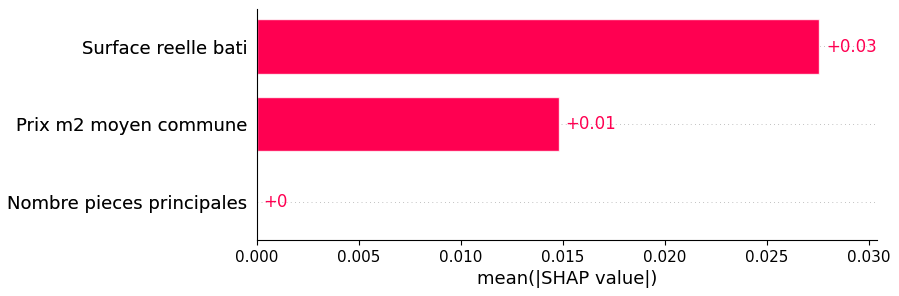



### B.Prédiction du prix de vente
Pour la prédiction du prix de vente, nous avons étudié plusieurs algorithmes de régression différents :
- __Régression linéaire__
- __Ridge__
- __Lasso__
- __SGDRegressor__
- __Random Forest regressor__

On fait quelques tests avec des variables "logiques" pour la prédiction du modèle, en incorporant nos variables open-data et du feature engineering.

Pour les variables : Surface reelle bati, Nombre pieces principales, Surface terrain, mois, année

| Modèle | MSE |
| :------| :---|
| Régression linéaire | 731530613746 |
| Ridge | 8205344142 |
| Lasso | 8205348595 |

En regardant les corrélations, on ne semble pas observer de réelles relations linéaires entre les variables.  
On décide de concentrer nos efforts sur les random forest.

Pour optimiser le temps, on décide de se concentrer uniquement sur deux modèles, SGD Regressor (qui inclut les régression linéaire, ridge et lasso) et les random forest regressor.  
On garde SGD regressor juste pour observer l'impact de nos variables open data (latitude et longitude).  

Pour tester nos modèles, on prend des échantillons de n = 50 000 individus pour avoir un temps de calcul de Gridsearch raisonnable.

#### SGDRegressor


---


On réalise à peu près la même étude que pour le decision tree.  
On utilise Grid search pour observer les résultats de notre SGDregressor :
```python
penalty : ['l2', 'l1', 'elasticnet', None]
alpha : [0.001, 0.1 , 1 ,10 ,100 ,1000]
```  

On trouve les résultats suivants (2 exemples) :

Uniquement sur les maisons  
n = 50 000  
Variables utilisées : Surface reelle bati, 'Prix m2 moyen commune, latitude, longitude  
**RMSE : 728213487134930.9 (squared=False)**  
**{'alpha': 1000, 'penalty': 'l2'}**  

Uniquement sur les appartements  
n = 50 000  
Variables utilisées : Surface reelle bati, 'Prix m2 moyen commune, latitude, longitude  
**RMSE : 217639111.33046177 (squared=False)**  
**{'alpha': 100, 'penalty': 'l1'}**  

Les résultats ne semblent pas au niveau, on a donc décidé de se concentrer principalement sur un Random forest.



#### Random forest regressor
---
Les corrélations entre les différentes variables n'étant pas très élevées, nous espérons avoir de bons résultats avec random Forest.  
De plus, nous avons mis beaucoup d'espoir dans certaines variables (latitude et longitude) qui auraient permis à l'arbre de traduire le rapprochement des communes entre elles.
On initie le Random forest, et on teste plusieurs paramètres de grid search pour optimiser notre modèle.  

Nous allons évaluer notre modèle sur son RMSE, et visualiser l'impact des variables à travers une analyse SHAP, pour voir leurs différents impacts.
Dans un soucis de synthèse, nous allons montrer ici trois cas, mais au total, nous avons essayé plus de trois paramétrages de modèles.

##### **_Déroulé de l'étude et experimentation_**

On met beaucoup de variables, et on regarde quels sont les paramètres pertinents dans la performance du modèle :
Nous obtenons des résultats corrects, mais nous cherchons à voir l'influence de toutes les variables :   

'Surface reelle bati', 'Prix m2 moyen region', 'Prix m2 moyen commune','latitude', 'longitude'  
**RMSE : 63491.78**  
{'max_depth': 10, 'min_samples_leaf': 1000, 'min_samples_split': 1000, 'n_estimators': 21}  

Les résultats sont plus performants (que ce que nous avions avant) mais il y a également plusieurs choses à soulever :      

Premièrement, pour min_sample_split & leaf, 1000 individus correspond à 0.02% du total d'individus d'entrainement( n = 50 000).  
On se rend compte que plus notre arbre aura des feuilles petites, plus il sera performant. Il faudra donc faire attention au sur-apprentissage, et à la complexité de notre modèle.  
**Il faudra donc faire un arbitrage.**  

On va donc décider de partir dans notre Grid search, de fixer nos paramètres 'max_depth' et 'n_estimators', qui sont aux alentours des mêmes valeurs à chaque fois, pour gagner du temps.
On va également itérer dans nos tailles de feuille avec des fractions plutôt que entiers, pour prendre en considération que notre modèle se fera sur 2 000 000 individus.

Deuxièmement, quel est l'impact des variables. Nous avons beaucoup de variables, est ce que toutes sont pertinentes ?  
A partir de maintenant, on va évaluer nos modèles en parallèles d'une analyse SHAP.

Par exemple :
**MSE : 79972.46**  
{'max_depth': 10, 'min_samples_leaf': 0.2, 'min_samples_split': 0.4}  

 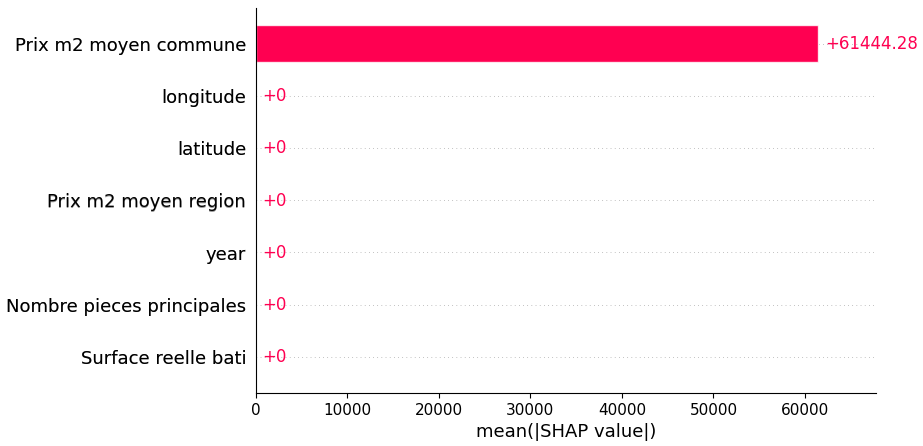

#### **_Amélioration du modèle_**

On se rend compte assez vite que le type local a une influence sur la qualité de la prédiction.
En effet, les locaux et les dépendances sont des bien atypique (Vendu pour un euro symbolique ou bien avec des valeurs de surfaces égales à zéro).
On fait le choix arbitraire à ce moment-là de créer une régression pour les maisons et les appartements, et nous procéderons autrement pour les dépendances et les locaux.

La deuxième observation, c'est sur la taille des feuilles.
Travailler en fraction nous permet de tester facilement notre foret sur 50 000 ou 2 000 000 d'individus.

**Uniquement pour les maisons :**

**RMSE : 65760.98**    
{'min_samples_leaf': 0.05, 'min_samples_split': 0.05}  

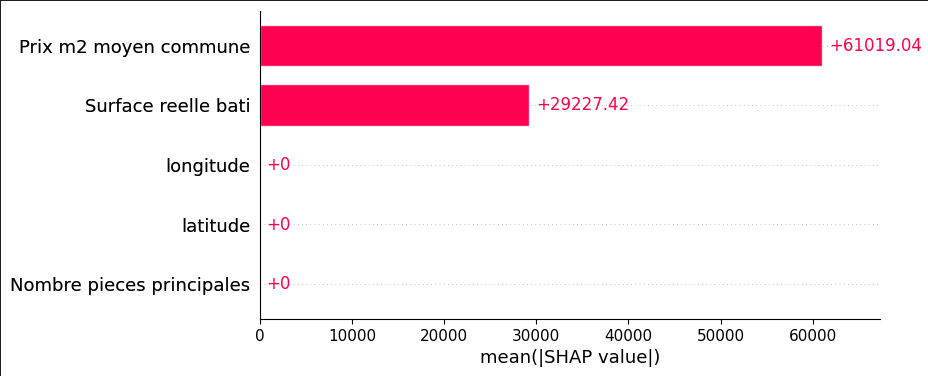

**RMSE : 60251.502**  
{'min_samples_leaf': 0.01, 'min_samples_split': 0.01}  

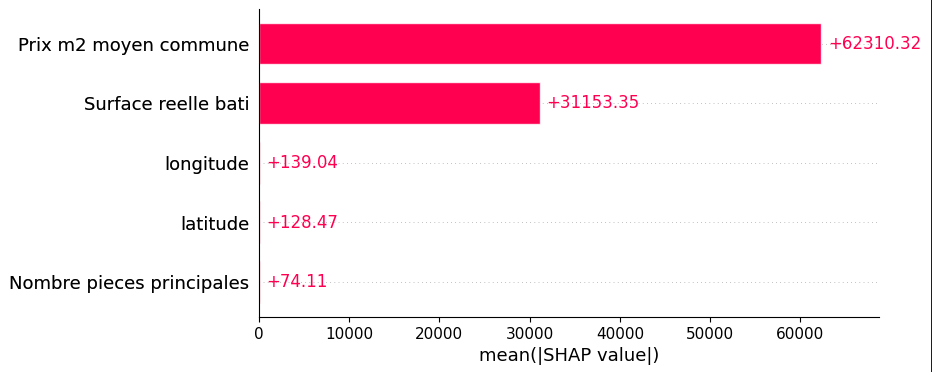

On observe une amélioration des performances des modèles, ainsi qu'une analyse plus fine de la prépondérance des variables.

En faisant plusieurs tests, on se rend compte que les performances ne s’améliorent pas spécialement après, on décide donc de rester sur ces paramètres pour ne pas trop complexifier le modèle.  
On va entrainer nos modèles uniquement sur **prix m² des communes**, et la **surface du bâtiment**.  

Après plusieurs tests, on choisit les paramètres suivants   

- **max_depth=20**
- **min_samples_leaf=0.01**
- **min_samples_split=0.01**
- **n_estimators=50**

On entraine nos modèles avec nos 2 millions d'individus pour obtenir ces résultats :  

##### Maison
Variables utilisées : 'Surface reelle bati', 'Prix m2 moyen commune'  
**RMSE : 58759.54**


##### Appartement
Variables utilisées : 'Surface reelle bati', 'Prix m2 moyen commune'  
**RMSE : 57856.43**

Les prédictions des locaux industriels et des dépendances se baseront sur les moyennes des prix des anciennes années, avec un facteur pour simuler l'augmentation des prix.

#### **_Modèle final_**

On peut ainsi créer notre modèle final, qui va prendre en variables d'entrée :
- Le type de local
- La surface du bien
- La région
- la commune

Pour évaluer sa cohérence, on l'utilise sur nos données 2018, 2019, 2020 et 2021.  
Cela nous permettra de potentiellement voir des valeurs aberrantes.

| Année | RMSE |
| :-----| :----|
| 2021 | 63294 |
| 2020 | 60597 |
| 2019 | 59448 |
| 2018 | 58813 |

Le modèle nous semble pertinent.

## VI. Conclusion
En conclusion, ce projet nous a tous permis d'acquérir de nouvelles compétences mais également de confirmer celles que nous avions déjà. Malgré quelques difficultés nous avons apprécier la réalisation de ce projet en équipe.

Avec plus de temps, nous aurions aimé ajouter des données en Opend data pour compléter ce projet. De plus,  nous aurions envisagé d'explorer des techniques de deep learning pour tirer parti d'un ensemble de données plus vaste. Enfin, la création d'une API (Application Programming Interface) pour notre modèle d'analyse prédictive aurait été une autre piste que nous aurions souhaité explorer.